<a href="https://colab.research.google.com/github/ManJ-PC/Visao_computacional-OMR/blob/master/B_Dedicated_Segmentation_Models_Total_Segmentator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dedicated Segmentation Models - Segment with TotalSegmentator

In this notebook, we're going to perform inference with TotalSegmentator, a segmentation tool of most major anatomical structures in any CT or MR image trained on a large scale dataset of CT and MR.

## Set up

We'll start by installing TotalSegmentator which can be done conveniently through pip (it may take a while...)

In [1]:
!pip install TotalSegmentator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.3/206.3 kB 9.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.3/52.3 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.5/906.5 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/

# Inference Abdominal CT

Now we are ready to segment a full 3D CT. We'll start by segmenting the abdominal CT we looked at before. This is as simple as calling TotalSegmentator and giving the NIfTI file name as an input.

TotalSegmentator will automatically create NIfTI files with all segmented structures in a *segmentations* folder.

In [2]:
!TotalSegmentator -i abdominal_ct.nii.gz -o segmentations


If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 4.63s
Predicting part 1 of 5 ...
100% 12/12 [00:04<00:00,  2.90it/s]
Predicting part 2 of 5 ...
100% 12/12 [00:01<00:00, 11.52it/s]
Predicting part 3 of 5 ...
100% 12/12 [00:00<00:00, 12.27it/s]
Predicting part 4 of 5 ...
100% 12/12 [00:01<00:00, 11.81it/s]
Predicting part 5 of 5 ...
100% 12/12 [00:00<00:00, 12.56it/s]
  Predicted in 144.11s
Resampling...
Saving segmentations...
  Saved in 1.74s


# Visualization

Great, now we can look at the results for a given slice as shown below. We'll start by plotting the aorta segmentation for example.

(-0.5, 100.5, 121.5, -0.5)

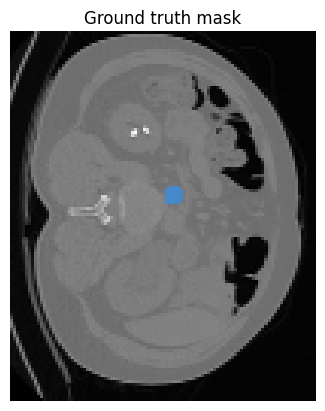

In [3]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# Load the .nii.gz file
file_path = 'abdominal_ct.nii.gz'
img_nii = nib.load(file_path)
image = img_nii.get_fdata()

file_path = 'segmentations/aorta.nii.gz'
seg_nii = nib.load(file_path)
seg = seg_nii.get_fdata()

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

fig, axes = plt.subplots()
slicenum = 80
axes.imshow(image[:, :, slicenum], 'gray')
show_mask(seg[:, :, slicenum], axes)
axes.title.set_text(f"Ground truth mask")
axes.axis("off")

Nice!
It would be great to see all segmented structures at the same time with different colors though right? You can develop that below!

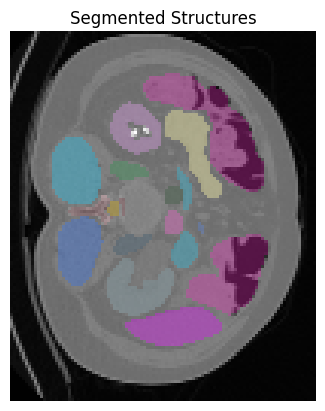

In [6]:
import os
# Load the .nii.gz file
file_path = 'abdominal_ct.nii.gz'
img_nii = nib.load(file_path)
image = img_nii.get_fdata()

# Automatically load all segmentation files in the 'segmentations' folder
segmentation_folder = 'segmentations'
segmentation_files = [f for f in os.listdir(segmentation_folder) if f.endswith('.nii.gz')]

# Load all segmentation masks
segmentations = [nib.load(os.path.join(segmentation_folder, file)).get_fdata() for file in segmentation_files]

def show_mask(mask, ax, color=None, alpha=0.6):
    """ Function to display a segmentation mask with a given color. """
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * np.array(color).reshape(1, 1, -1)
    ax.imshow(mask_image, alpha=alpha)

def generate_random_color():
    """ Generate a random RGB color. """
    return np.concatenate([np.random.random(3), np.array([0.6])], axis=0)

fig, axes = plt.subplots()

slicenum = 80
axes.imshow(image[:, :, slicenum], cmap='gray')

# Display each segmentation with a unique color
for seg in segmentations:
    random_color = generate_random_color()
    show_mask(seg[:, :, slicenum], axes, color=random_color)

axes.title.set_text(f"Segmented Structures")
axes.axis("off")
plt.show()

In [4]:
# Your code here!
# Load the segmentation masks
segmentation_files = ['segmentations/aorta.nii.gz', 'segmentations/organ3.nii.gz']
segmentations = [nib.load(file_path).get_fdata() for file_path in segmentation_files]

def show_mask(mask, ax, color=None, alpha=0.6):
    """ Function to display a segmentation mask with a given color. """
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * np.array(color).reshape(1, 1, -1)
    ax.imshow(mask_image, alpha=alpha)

def generate_random_color():
    """ Generate a random RGB color. """
    return np.concatenate([np.random.random(3), np.array([0.6])], axis=0)

fig, axes = plt.subplots()

slicenum = 80
axes.imshow(image[:, :, slicenum], cmap='gray')

# Display each segmentation with a unique color
for seg in segmentations:
    random_color = generate_random_color()
    show_mask(seg[:, :, slicenum], axes, color=random_color)

axes.title.set_text(f"Segmented Structures")
axes.axis("off")
plt.show()


FileNotFoundError: No such file or no access: 'segmentations/organ2.nii.gz'

# Inference Cardiac CT

Now let's try the same for the cardiac CT. As you remember this is in DICOM files but TotalSegmentator will organize everything for us and segment it as below.

In [ ]:
!TotalSegmentator -i cardiac_ct -o segmentations


If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Converting dicom to nifti...
  found image with shape (512, 512, 99)
Resampling...
  Resampled in 2.29s
Predicting part 1 of 5 ...
100% 4/4 [00:02<00:00,  1.64it/s]
Predicting part 2 of 5 ...
100% 4/4 [00:00<00:00, 14.20it/s]
Predicting part 3 of 5 ...
100% 4/4 [00:00<00:00, 16.38it/s]
Predicting part 4 of 5 ...


# Visualization

As before, it would be nice to see the segmented structures! Please implement that below for a given slice of your choice. Why not look at coronal/sagittal slices?

femur_right.nii.gz
brachiocephalic_vein_left.nii.gz
rib_left_4.nii.gz
vertebrae_C2.nii.gz
iliopsoas_right.nii.gz
iliac_vena_right.nii.gz
rib_right_9.nii.gz
vertebrae_L2.nii.gz
vertebrae_T5.nii.gz
clavicula_right.nii.gz
spleen.nii.gz
pulmonary_vein.nii.gz
duodenum.nii.gz
esophagus.nii.gz
urinary_bladder.nii.gz
humerus_left.nii.gz
gluteus_minimus_left.nii.gz
scapula_left.nii.gz
trachea.nii.gz
gluteus_maximus_left.nii.gz
prostate.nii.gz
small_bowel.nii.gz
hip_left.nii.gz
vertebrae_L5.nii.gz
vertebrae_T7.nii.gz
vertebrae_L1.nii.gz
brachiocephalic_trunk.nii.gz
autochthon_right.nii.gz
lung_middle_lobe_right.nii.gz
vertebrae_C5.nii.gz
vertebrae_T10.nii.gz
vertebrae_T4.nii.gz
rib_right_4.nii.gz
liver.nii.gz
lung_lower_lobe_left.nii.gz
brain.nii.gz
rib_right_8.nii.gz
autochthon_left.nii.gz
adrenal_gland_right.nii.gz
rib_right_6.nii.gz
gluteus_maximus_right.nii.gz
vertebrae_L3.nii.gz
vertebrae_L4.nii.gz
stomach.nii.gz
gluteus_minimus_right.nii.gz
rib_left_7.nii.gz
rib_left_9.nii.gz
rib_right_2.n

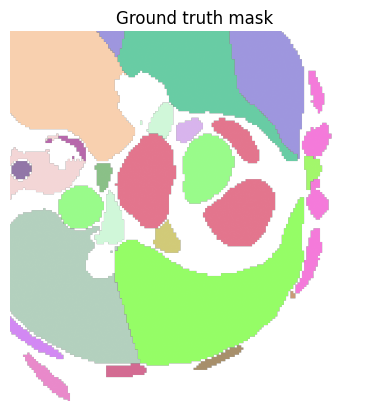

In [ ]:
# Your code here!
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import os

# Load the .nii.gz file
file_path = 'abdominal_ct.nii.gz'
img_nii = nib.load(file_path)
image = img_nii.get_fdata()

# Automatically load all segmentation files in the 'segmentations' folder
segmentation_folder = 'segmentations'
segmentation_files = [f for f in os.listdir(segmentation_folder) if f.endswith('.nii.gz')]

# Load all segmentation masks
segmentations = [nib.load(os.path.join(segmentation_folder, file)).get_fdata() for file in segmentation_files]

def show_mask(mask, ax, color=None, alpha=0.6):
    """ Function to display a segmentation mask with a given color. """
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * np.array(color).reshape(1, 1, -1)
    ax.imshow(mask_image, alpha=alpha)

def generate_random_color():
    """ Generate a random RGB color. """
    return np.concatenate([np.random.random(3), np.array([0.6])], axis=0)

def show_slices(image, segmentations, slice_num, view='axial'):
    fig, axes = plt.subplots(1, 1, figsize=(8, 8))

    if view == 'axial':
        axes.imshow(image[:, :, slice_num], cmap='gray')
    elif view == 'coronal':
        axes.imshow(np.rot90(image[slice_num, :, :]), cmap='gray')
    elif view == 'sagittal':
        axes.imshow(np.rot90(image[:, slice_num, :]), cmap='gray')

    # Display each segmentation with a unique color
    for seg in segmentations:
        random_color = generate_random_color()
        if view == 'axial':
            show_mask(seg[:, :, slice_num], axes, color=random_color)
        elif view == 'coronal':
            show_mask(np.rot90(seg[slice_num, :, :]), axes, color=random_color)
        elif view == 'sagittal':
            show_mask(np.rot90(seg[:, slice_num, :]), axes, color=random_color)

    axes.title.set_text(f"Segmented Structures ({view.capitalize()} view)")
    axes.axis("off")
    plt.show()

# Example to show a coronal slice at index 80
slice_num = 80
show_slices(image, segmentations, slice_num, view='coronal')

# Example to show a sagittal slice at index 80
slice_num = 80
show_slices(image, segmentations, slice_num, view='sagittal')


# Descriptors

Finally, segmentations are often used to extract features that describe the anatomical/pathological structures of interest. These features, also known as radiomics, can be used as descriptors to characterize structures.

These features can be as simple as the structure's volume or mean intensity but could also go into more complex statistical and texture measures.

Here we'll stick to the simple stuff. Can you compute the volume and mean intensity of a couple of structures? (Don't forget that pixels have sizes and a clinician will be interested in size in millimeters, not pixels)

In [ ]:
# Your code here!

Great, looks like you've already tried some inference with a dedicated model. Time to look at something more generic on part C!